<a href="https://colab.research.google.com/github/AlexHades/challenge-alura-store/blob/master/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [17]:
# Calculando los ingresos por cada tienda
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

In [18]:
# Impimiendo los ingresos
for i in range(1,5):
  print(f"Ingresos de la tienda {i}: {eval(f'ingresos_tienda{i}')}")

Ingresos de la tienda 1: 1150880400.0
Ingresos de la tienda 2: 1116343500.0
Ingresos de la tienda 3: 1098019600.0
Ingresos de la tienda 4: 1038375700.0


In [19]:
df_ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso": [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]
})

# 2. Ventas por categoría

In [5]:
# Ventas por Categoría de cada tienda
ventas_por_categoria1 = tienda['Categoría del Producto'].value_counts()
ventas_por_categoria2 = tienda2['Categoría del Producto'].value_counts()
ventas_por_categoria3 = tienda3['Categoría del Producto'].value_counts()
ventas_por_categoria4 = tienda4['Categoría del Producto'].value_counts()

In [6]:
# Mostrar el top 3 de las categorías junto a sus ventas de cada tienda
for i in range(1,5):
  print(f"Top 3 de categorías de la tienda {i}:")
  print(eval(f"ventas_por_categoria{i}").head(3))
  print()

Top 3 de categorías de la tienda 1:
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64

Top 3 de categorías de la tienda 2:
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

Top 3 de categorías de la tienda 3:
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

Top 3 de categorías de la tienda 4:
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64



# 3. Calificación promedio de la tienda


In [7]:
# Calificación promedio por cada tienda
calificacion_promedio1 = tienda['Calificación'].mean()
calificacion_promedio2 = tienda2['Calificación'].mean()
calificacion_promedio3 = tienda3['Calificación'].mean()
calificacion_promedio4 = tienda4['Calificación'].mean()

In [8]:
# Mostrar calificación promedio por tienda
for i in range(1,5):
  print(f"Calificación promedio de la tienda {i}: {round(eval(f'calificacion_promedio{i}'),2)}")

Calificación promedio de la tienda 1: 3.98
Calificación promedio de la tienda 2: 4.04
Calificación promedio de la tienda 3: 4.05
Calificación promedio de la tienda 4: 4.0


In [26]:
df_calificacion_prom = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación": [calificacion_promedio1, calificacion_promedio2, calificacion_promedio3, calificacion_promedio4]
})

# 4. Productos más y menos vendidos

In [9]:
# Agrupar por Producto, contarlos y ordenarlos
productos_vendidos1 = tienda.groupby('Producto')['Producto'].count().sort_values()
productos_vendidos2 = tienda2.groupby('Producto')['Producto'].count().sort_values()
productos_vendidos3 = tienda3.groupby('Producto')['Producto'].count().sort_values()
productos_vendidos4 = tienda4.groupby('Producto')['Producto'].count().sort_values()

Top 10 de productos más vendidos de la tienda 1:


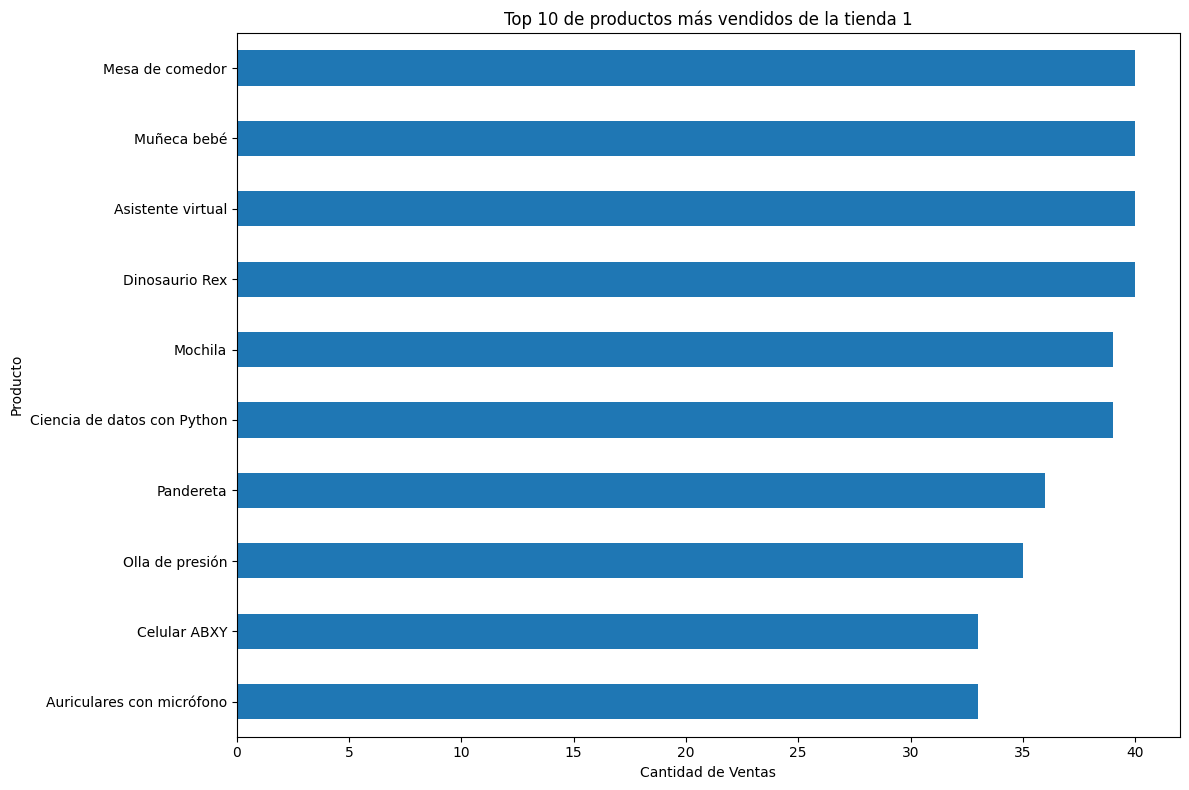

Top 10 de productos más vendidos de la tienda 2:


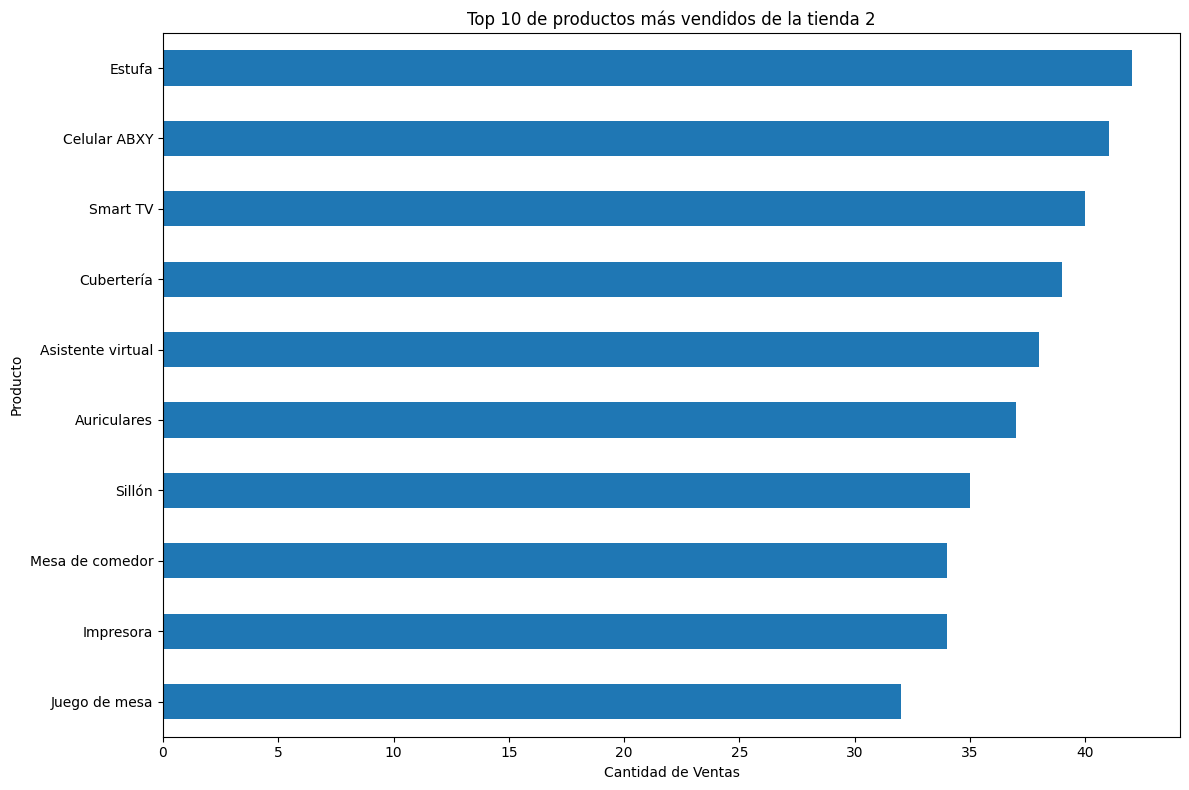

Top 10 de productos más vendidos de la tienda 3:


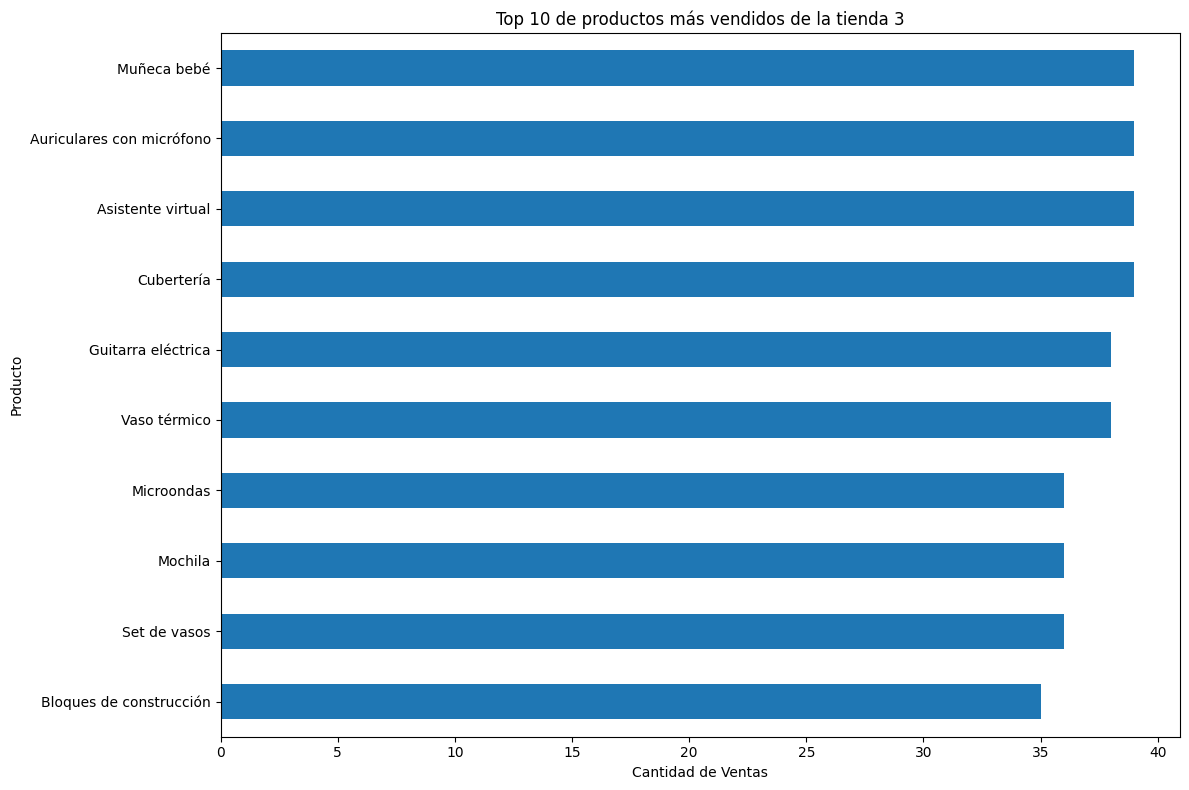

Top 10 de productos más vendidos de la tienda 4:


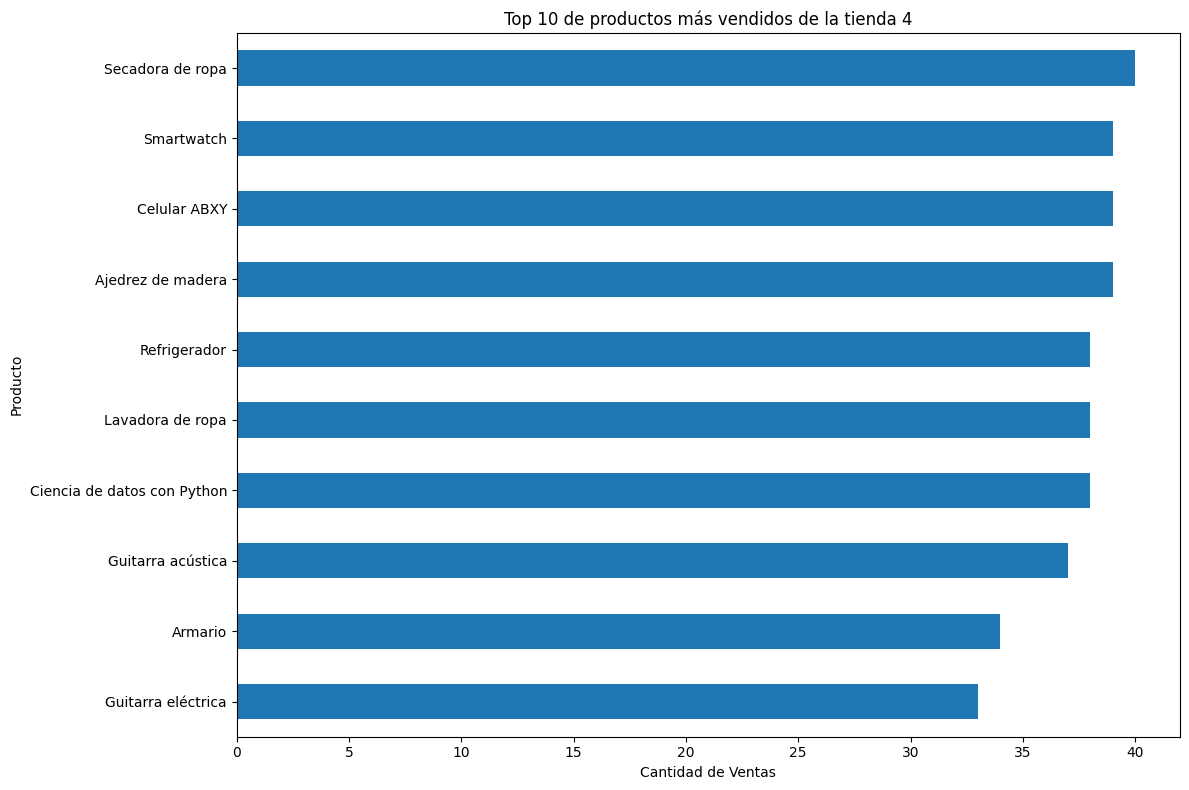

In [10]:
# Vista gráfica del top 10 de productos más vendidos por tienda
import matplotlib.pyplot as plt
for i in range(1,5):
  print(f"Top 10 de productos más vendidos de la tienda {i}:")
  df = globals()[f"productos_vendidos{i}"].head(10)
  df.plot(kind='barh', figsize=(12,8),
            xlabel='Cantidad de Ventas', ylabel='Producto')

  plt.title(f'Top 10 de productos más vendidos de la tienda {i}')
  plt.tight_layout()
  plt.show()

# 5. Envío promedio por tienda

In [11]:
# Calcular el promedio de Costo de envío
envio_promedio_tienda1 = tienda['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

In [12]:
# Mostrar el resultado de cada tienda
for i in range(1,5):
  print(f"El gasto promedio por envío de la tienda {i} es: {round(eval(f'envio_promedio_tienda{i}'),2)}")

El gasto promedio por envío de la tienda 1 es: 26018.61
El gasto promedio por envío de la tienda 2 es: 25216.24
El gasto promedio por envío de la tienda 3 es: 24805.68
El gasto promedio por envío de la tienda 4 es: 23459.46


In [30]:
df_envio_promedio_tienda = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo Promedio por Envío": [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]
})

# 6. Análisis gráfico

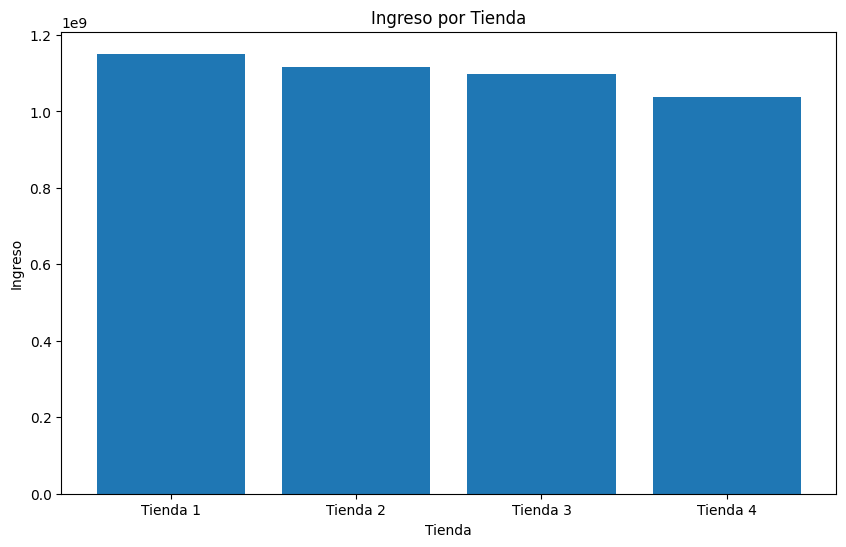

In [22]:
# Gráfico de ingresos por tienda
plt.figure(figsize=(10,6))
plt.bar(df_ingresos["Tienda"], df_ingresos["Ingreso"])
plt.xlabel("Tienda")
plt.ylabel("Ingreso")
plt.title("Ingreso por Tienda")
plt.show()

In [25]:
df_calificacion_prom

,Tienda,Ingreso
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


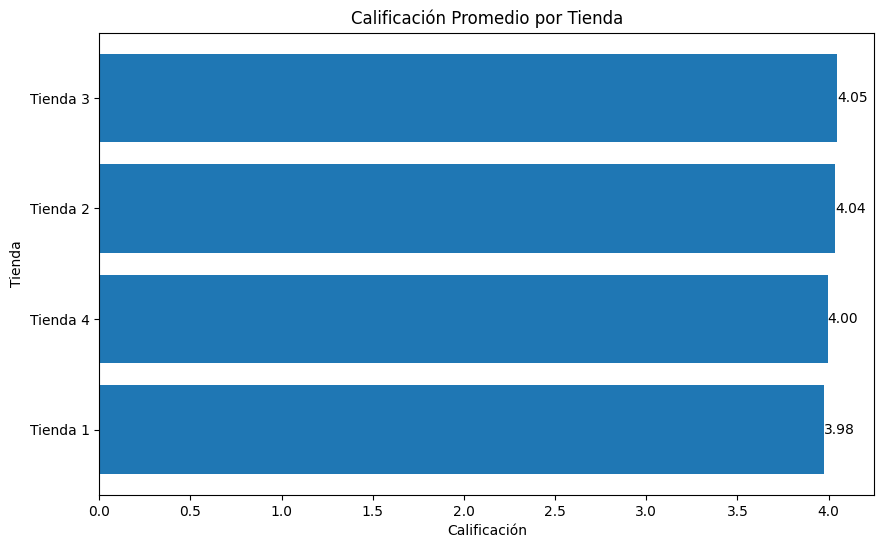

In [38]:
# Gráfico de Calificación por tienda
df_calificacion_prom = df_calificacion_prom.sort_values(by="Calificación", ascending=True)
plt.figure(figsize=(10,6))
bars = plt.barh(df_calificacion_prom["Tienda"], df_calificacion_prom["Calificación"])
plt.xlabel("Calificación")
plt.ylabel("Tienda")
plt.title("Calificación Promedio por Tienda")

for bar in bars:
    valor = bar.get_width()
    plt.text(
        valor,
        bar.get_y() + bar.get_height()/2,
        f"{valor:.2f}",
        va='center', ha='left'
    )

plt.show()

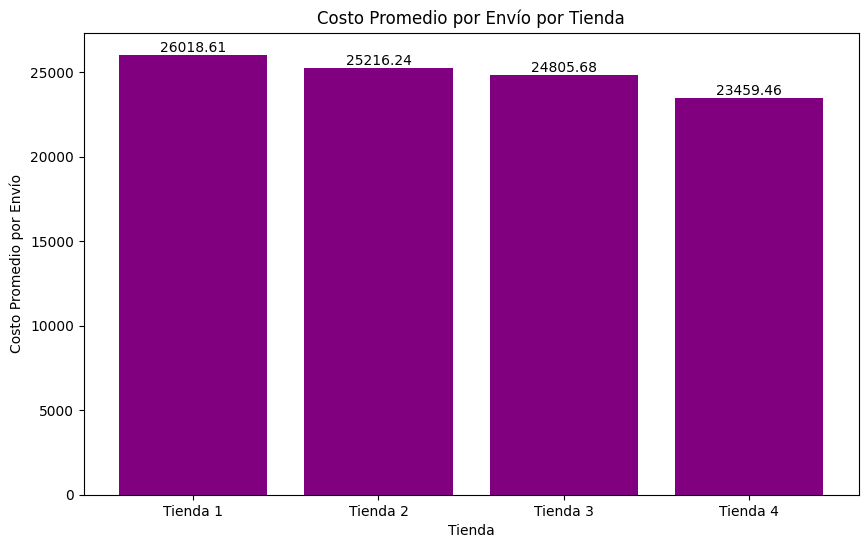

In [41]:
# Gráfico de Costes de envío
df_envio_promedio_tienda = df_envio_promedio_tienda.sort_values(by="Costo Promedio por Envío", ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(df_envio_promedio_tienda["Tienda"], df_envio_promedio_tienda["Costo Promedio por Envío"])
plt.bar(df_envio_promedio_tienda["Tienda"], df_envio_promedio_tienda["Costo Promedio por Envío"], color="purple")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio por Envío")
plt.title("Costo Promedio por Envío por Tienda")

for bar in bars:
    valor = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        valor,
        f"{valor:.2f}",
        ha='center', va='bottom'
    )

plt.show()

# 7. Informe Final